# Getting Started with OpenAI Gym
## Installation

Can either use pip or install directly from the github source repository

In [ ]:
# install from pip
# [all] installs more dependencies environments may need
!pip install gym[all]

  Using cached box2d_py-2.3.8-cp37-cp37m-manylinux1_x86_64.whl (448 kB)
  Using cached mujoco-py-1.50.1.68.tar.gz (120 kB)
  ERROR: Failed building wheel for mujoco-py
  Running setup.py clean for mujoco-py
Failed to build mujoco-py
    Running setup.py install for mujoco-py ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-q7qyyo03/mujoco-py_a581aadcea9b4ab79e8b8916471eca12/setup.py'"'"'; __file__='"'"'/tmp/pip-install-q7qyyo03/mujoco-py_a581aadcea9b4ab79e8b8916471eca12/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-g7yju20s/install-record.txt --single-version-externally-managed --compile --install-headers /usr/local/includ

In [ ]:
# Or Build from Source
# From git repository
!git clone https://github.com/openai/gym
!cd gym
!pip install -e .

## About

OpenAI Gym is about providing environments for reinforcement learning.
Doesn't make any assumptions of the agent you use.
Provides a general interface to access different environments.

Helps provide better benchmarks

Helps to standardize Environments

## Q-Learning Agent

In [ ]:
import numpy as np

def get_state_index(observation):
    position = observation[0]
    velocity = observation[1]
    pole_angle = observation[2]
    pole_velocity = observation[3]
    side = 0
    going_towards = 0
    pole_side = 0
    pole_moving = 0
    if position > 0:
        side = 0
    else:
        side = 1
    if velocity > 0:
        going_towards = 1
    else:
        going_towards = 1
    if pole_angle > 0:
        pole_side = 0
    else:
        pole_side = 1
    if pole_velocity > 0:
        pole_moving = 0
    else:
        pole_moving = 1

    return side + going_towards*2 + pole_side*4 + pole_moving*8

class QAgent:

    def __init__(self , env, epsilon: float , alpha: float, gamma: float):
        self.env = env
        self.action_space = env.action_space
        self.observation_space = env.observation_space
        # 4 possible actions 16 possible states
        # start at random to encourage exploring
        self.q_table : np.ndarray = np.random.normal(size=(16, self.env.action_space.n))
        self.epsilon: float = epsilon
        self.alpha: float =  alpha
        self.gamma: float = gamma
        # self.policies = initialize_policy()

    def choose_action(self, observe) -> int:
        rand = np.random.rand()
        actions = range(0, self.env.action_space.n)
        # random action
        if rand <= self.epsilon:
            action = np.random.choice(actions)
            return action
        # follow policy
        else:
            action = self.best_action(observe)
            return action

    def max_action_q(self, index, obs) -> float:
        q_val = np.NINF
        actions = range(0, self.env.action_space.n)
        for a in actions:
            q_val = max(q_val ,self.q_table[index][a])
        return q_val

    def best_action(self, observe) -> int:
        actions = range(0, self.env.action_space.n)
        best = []
        action_q = np.NINF
        index = get_state_index(observe)
        for a in actions:
            q_val = self.q_table[index][a]
            # set action and associated q-val as best
            if q_val > action_q:
                best = [a]
                action_q = q_val
            elif q_val == action_q:
                # have both actions in best
                best.append(a)
        if len(best) > 1:
            ret: int = np.random.choice(best)
        else:
            ret: int = best[0]
        return ret

    def step(self , observation):
        action = self.choose_action(observation)
        observe, re, finished, info = self.env.step(action)
        index = get_state_index(observation)
        next_index = get_state_index(observe)
        loss = (re + self.gamma * self.max_action_q(next_index, observe) - self.q_table[index][action])
        self.q_table[index][action] = self.q_table[index][action] + self.alpha * loss
        if finished:
            # print(self.q_table)
            self.env.reset()
        return observe, re, finished, action

    def reset(self, env):
        env.reset()
        self.q_table = np.random.normal(size=(16,self.action_space.n))

## Pole Cart Example

Pole attached to un-actuated joint to a cart

Observations Box(4)
  0. cart position between -4.8 and 4.8 is
  1. Cart velocity from - infinity to infinity
  2. Pole Angle from - 0.418 radians (- 24 degrees) to 0.418 radians ( 24 degrees)
  3. Pole Angular velocity from - infinity to infinity

Actions 0: Push cart left 1: Push cart right

Reward: +1 for every time step taken

Episode done when pole is more than 15 degrees from vertical position or cart is 2.4 units from the center

Observations start at a random normal value between - .05 and .05

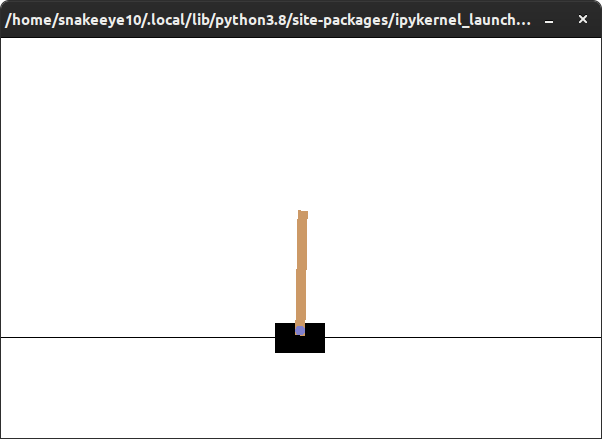

In [ ]:
# Simple example
# Control problem of the CartPole
from IPython.display import Image
Image("PoleCart.png")

In [ ]:
import gym

env = gym.make("CartPole-v0")
env.reset()
max_steps = 100
for _ in range(max_steps):
    env.render()
    done = False
    while not done:
        obs, reward, done, info = env.step(env.action_space.sample())
    env.reset()
env.close()

In [ ]:
def epsilon_decay(eps: float) -> float:
    #eps = 1.0 * np.e**( - episode / max)
    eps = eps * 0.9
    return eps

epsilon = 1.0
q_agent = QAgent(env, epsilon, 0.1, 1.0)
for i in range(max_steps):
    obs = env.reset()
    done = False
    epsilon = epsilon_decay(epsilon)
    q_agent.epsilon = epsilon
    steps = 0
    total_reward = 0
    while not done:
        env.render()
        obs, reward, done, info = q_agent.step(obs)
        #print(obs)
        total_reward += reward
    print(total_reward)
env.close()

NameError: name 'QAgent' is not defined

## Environment Basics

### Observations
Step function returns 4 values just like in our Assignment1

1: An observation is an object that represents some state of the environment.
This could be pixel data, angles of joints on a robot, or a state of the board in a board-game.

2: Reward is a float amount achieved by previous action.

3: Done boolean of when the episode is done and it is time for the environment to reset.

4: Info is a dict which can have information that can be useful for debugging. The agent shouldn't use this info.


### Spaces

Every environment has an action space and an observation space.

In [ ]:
env = gym.make("CartPole-v0")
print(env.action_space)
print(env.observation_space)

Discrete(2)
Box(-3.4028234663852886e+38, 3.4028234663852886e+38, (4,), float32)


The discrete space allows non-negative numbers.

The box space is an n-dimensional box.
Observations are arrays of 4 numbers.

In [ ]:
# Check the box's bounds

print(env.observation_space.high)

print(env.observation_space.low)

[4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]
[-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]


Can sample a space

In [ ]:
from gym import spaces
# Set w/ 10 elements 0 - 9
space = spaces.Discrete(10)
# n is size of space
print(space.n)
# sample a possible value
x = space.sample()
print(x)

10
2


## Types of Environments

### Classic control (i.e. Cartpole)
### Toytext

Both of these are easy places to get started.
Problems seen in a lot of RL Literature.
A number of examples from our textbook are available here

In [ ]:
# Toy-text Example
# Blackjack: (Goal: get as close to 21 without going over)
# Observations are 3-tuple of players current sum, dealer's showing card, and whether the player holds a usable ace
# reward is outcome win, lose, draw (+1, 0 -1)
rewards = {
    1: "Win",
    0: "Draw",
    -1: "Lose"
}
# actions are hit=1 or stick=0
actions = {
    0: "Hit",
    1: "Stick"
}
text_env = gym.make("Blackjack-v0")
text_env.reset()
max_steps = 10
for i in range(max_steps):
    done = False
    print(f"Game {i} =========\n")
    while not done:
        action = text_env.action_space.sample()
        print(actions[action])
        obs, reward, done, info = text_env.step(action)
        print(obs)
        print(rewards[reward])

    text_env.reset()

text_env.close()

Game 0 =========

Stick
(24, 2, False)
Lose
Game 1 =========

Hit
(17, 10, False)
Win
Game 2 =========

Stick
(16, 2, False)
Draw
Hit
(16, 2, False)
Lose
Game 3 =========

Hit
(11, 2, False)
Win
Game 4 =========

Hit
(15, 10, False)
Lose
Game 5 =========

Hit
(16, 10, False)
Lose
Game 6 =========

Stick
(20, 8, False)
Draw
Hit
(20, 8, False)
Win
Game 7 =========

Hit
(13, 1, False)
Lose
Game 8 =========

Stick
(15, 9, False)
Draw
Stick
(18, 9, False)
Draw
Hit
(18, 9, False)
Lose
Game 9 =========

Hit
(13, 9, False)
Lose


### Algorithmic
Learn Computational tasks ( like reversing a sequence ) purely from examples

### Atari
Play classic Atari Games

Uses arcade learning environment which uses Stella Atari Emulator
Environments often come with 2 versions one with RAM as input and the other with pixels as input

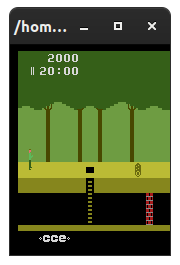

In [ ]:
# Example: Pitfall
# Input: RGB pixels of screen image (shape: 210, 160, 3)
from IPython.display import Image
Image("Pitfall.png")

In [ ]:
import gym

atari_env = gym.make("Pitfall-v0")
atari_env.reset()

max_steps = 5000
for _ in range(max_steps):
    atari_env.render()
    atari_env.step(atari_env.action_space.sample())
atari_env.close()

### 2D and 3D Robots
Uses MuJoCo physics engine

## Registry

To list available environments
use the registry

In [ ]:
from gym import envs
print(envs.registry.all())

dict_values([EnvSpec(Copy-v0), EnvSpec(RepeatCopy-v0), EnvSpec(ReversedAddition-v0), EnvSpec(ReversedAddition3-v0), EnvSpec(DuplicatedInput-v0), EnvSpec(Reverse-v0), EnvSpec(CartPole-v0), EnvSpec(CartPole-v1), EnvSpec(MountainCar-v0), EnvSpec(MountainCarContinuous-v0), EnvSpec(Pendulum-v0), EnvSpec(Acrobot-v1), EnvSpec(LunarLander-v2), EnvSpec(LunarLanderContinuous-v2), EnvSpec(BipedalWalker-v3), EnvSpec(BipedalWalkerHardcore-v3), EnvSpec(CarRacing-v0), EnvSpec(Blackjack-v0), EnvSpec(KellyCoinflip-v0), EnvSpec(KellyCoinflipGeneralized-v0), EnvSpec(FrozenLake-v0), EnvSpec(FrozenLake8x8-v0), EnvSpec(CliffWalking-v0), EnvSpec(NChain-v0), EnvSpec(Roulette-v0), EnvSpec(Taxi-v3), EnvSpec(GuessingGame-v0), EnvSpec(HotterColder-v0), EnvSpec(Reacher-v2), EnvSpec(Pusher-v2), EnvSpec(Thrower-v2), EnvSpec(Striker-v2), EnvSpec(InvertedPendulum-v2), EnvSpec(InvertedDoublePendulum-v2), EnvSpec(HalfCheetah-v2), EnvSpec(HalfCheetah-v3), EnvSpec(Hopper-v2), EnvSpec(Hopper-v3), EnvSpec(Swimmer-v2), EnvSp

Gives list of envSpec objects
These define the parameters for a task

Can add your own environments to the registry to make them available

## References

OpenAI Gym Documentation
https://gym.openai.com/docs/